# Linear Regression
- **Dataset**: Heights and Weights Dataset
- **Source**: Kaggle
- **Model**: Simple Linear Regression

## 1. Data Loading

In [41]:
import pandas as pd

In [42]:
path = '../Data Source/Kaggle/SOCR-HeightWeight.csv'
df = pd.read_csv(path)
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


## 2. Understanding Dataset

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           25000 non-null  int64  
 1   Height(Inches)  25000 non-null  float64
 2   Weight(Pounds)  25000 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 586.1 KB


### Insights:
- No null values.
- No datatype conversion required.

## 3. Stats Summary

In [44]:
df.describe()

,Index,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000,25000.000000
mean,12500.500000,67.993114,127.079421
std,7217.022701,1.901679,11.660898
min,1.000000,60.278360,78.014760
25%,6250.750000,66.704397,119.308675
50%,12500.500000,67.995700,127.157750
75%,18750.250000,69.272958,134.892850
max,25000.000000,75.152800,170.924000


## 4. Data Transformation
- Height : From **inches** to **centimeters**
- Weight : From **pounds** to **kilograms**

In [45]:
def inch_to_cm(data):
    # 1 inch = 2.54 cm
    return data * 2.54

def pound_to_kg(data):
    ## For least error:
    # 1 pound = 0.453592 kg
    return data * 0.453592

In [46]:
df['Height(cm)'] = inch_to_cm(df['Height(Inches)'])

In [47]:
df['Weight(kg)'] = pound_to_kg(df['Weight(Pounds)'])

In [48]:
df.head()

,Index,Height(Inches),Weight(Pounds),Height(cm),Weight(kg)
0,1,65.78331,112.9925,167.089607,51.252494
1,2,71.51521,136.4873,181.648633,61.909547
2,3,69.39874,153.0269,176.272800,69.411778
3,4,68.21660,142.3354,173.270164,64.562199
4,5,67.78781,144.2971,172.181037,65.452010


## 5. Drop Unnecessary Columns

In [49]:
df = df.drop('Index', axis=1)

In [50]:
df = df.drop('Height(Inches)', axis=1)

In [51]:
df = df.drop('Weight(Pounds)', axis=1)

In [52]:
df.head()

,Height(cm),Weight(kg)
0,167.089607,51.252494
1,181.648633,61.909547
2,176.272800,69.411778
3,173.270164,64.562199
4,172.181037,65.452010


## 6. Relationship Check

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 1.0, 'Height(cm) vs Weight(kg)')

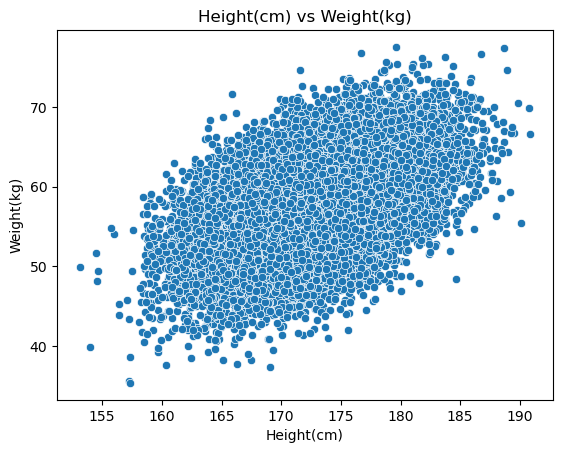

In [54]:
# scatter plot
sns.scatterplot(data=df, x='Height(cm)', y='Weight(kg)')
plt.title('Height(cm) vs Weight(kg)')

- 25000 values are too much to plot using scatter plot

C:\Users\GARDAS AKASH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\GARDAS AKASH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


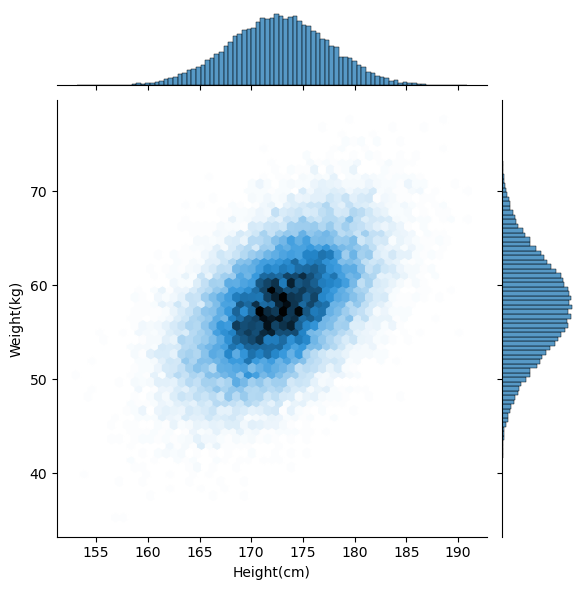

In [55]:
# jointplot
sns.jointplot(data=df, x='Height(cm)', y='Weight(kg)', kind='hex')

## 7. Distribution Check

C:\Users\GARDAS AKASH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Height(cm)', ylabel='Count'>

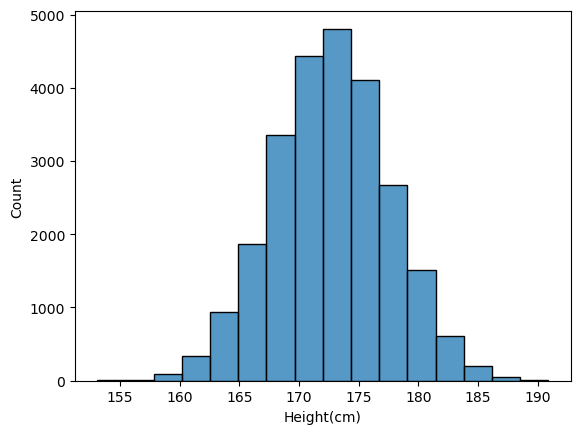

In [56]:
# Height variable
sns.histplot(data=df, x='Height(cm)', bins='sturges')

### Insights
- Mostly the heights are distributed in the range of 165 to 180 cm.

## 8. Outlier Analysis

<Axes: xlabel='Height(cm)'>

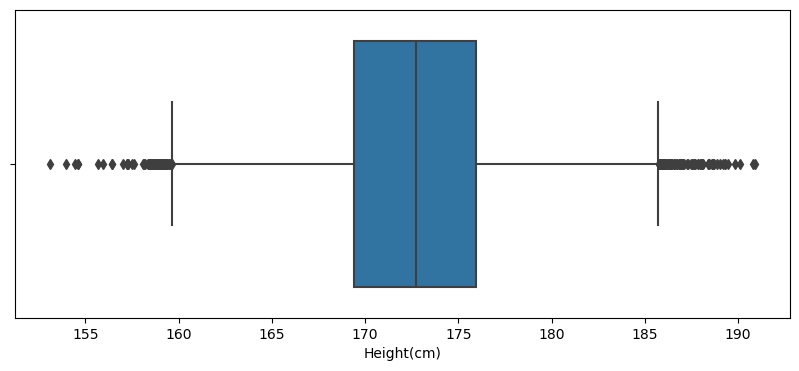

In [57]:
# Height
plt.figure(figsize=(10, 4))
sns.boxplot(data=df, x='Height(cm)')

<Axes: xlabel='Weight(kg)'>

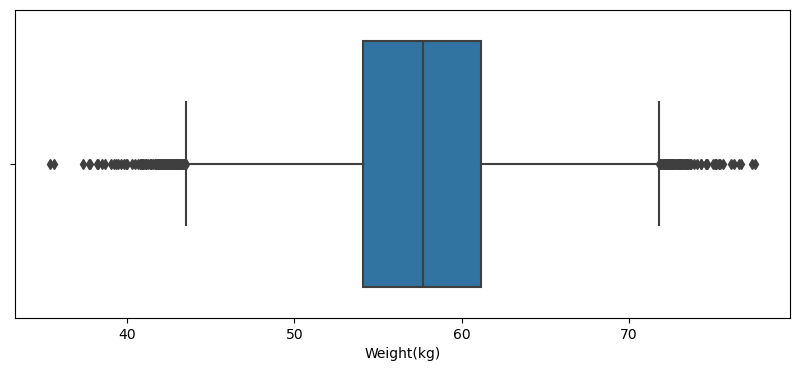

In [58]:
# Weight
plt.figure(figsize=(10, 4))
sns.boxplot(data=df, x='Weight(kg)')

In [59]:
# IQR Analysis
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
print(f'Lower: \n{lower}\n')
print(f'Upper: \n{upper}')

Lower: 
Height(cm)    159.642956
Weight(kg)     43.514175
dtype: float64

Upper: 
Height(cm)    185.739526
Weight(kg)     71.789603
dtype: float64


In [60]:
# Number of outliers
df[
(df['Height(cm)'] < lower['Height(cm)']) |
(df['Height(cm)'] > upper['Height(cm)']) | 
(df['Weight(kg)'] < lower['Weight(kg)']) |
(df['Weight(kg)'] > upper['Weight(kg)'])
].count()

Height(cm)    343
Weight(kg)    343
dtype: int64

### Insights:
- Comparatively less number of outliers. so, can be deleted.

In [61]:
# Delete filter outliers
df = df[
(df['Height(cm)'] >= lower['Height(cm)']) &
(df['Height(cm)'] <= upper['Height(cm)']) & 
(df['Weight(kg)'] >= lower['Weight(kg)']) &
(df['Weight(kg)'] <= upper['Weight(kg)'])
]

In [62]:
df.shape

(24657, 2)

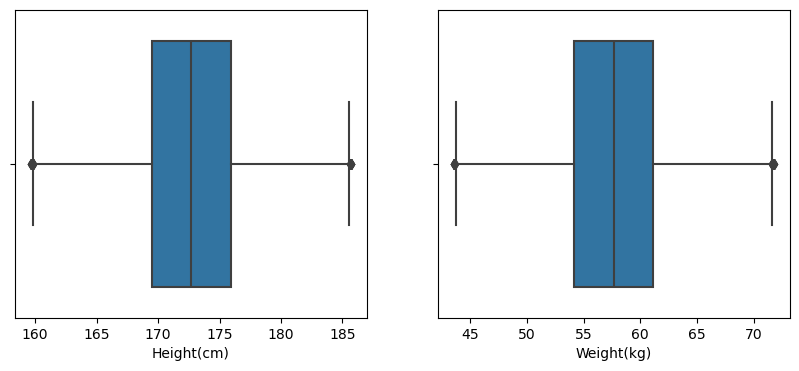

In [63]:
# Verification
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Height(cm)')
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Weight(kg)')
plt.show()

## 9. Feature and Target Seperation

In [64]:
X = df[['Height(cm)']] # Ensure 2D
X.ndim

2

In [65]:
y = df['Weight(kg)'] # one dim
y.ndim

1

## 10. Train-Test Split

In [66]:
from sklearn.model_selection import train_test_split

In [79]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=42
)

## 11. Feature Standardization

In [80]:
from sklearn.preprocessing import StandardScaler

In [81]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 12. Model Building

In [82]:
from sklearn.linear_model import LinearRegression

In [83]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [84]:
print('Coefficients:')
print(f'Slope (m): {model.coef_[0]}')
print(f'Intercept (c): {model.intercept_}')

Coefficients:
Slope (m): 2.446041244871022
Intercept (c): 57.63626964591637


In [85]:
y_pred = model.predict(X_test_scaled)

## 13. Performance Evaluation

In [86]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [87]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'R2 score: {r2}')
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

R2 score: 0.24129269794463937
MAE: 3.5415961792886934
MSE: 19.417915282722618
RMSE: 4.4065763675128355


## 14. Best Fit Line Visualization

C:\Users\GARDAS AKASH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\GARDAS AKASH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


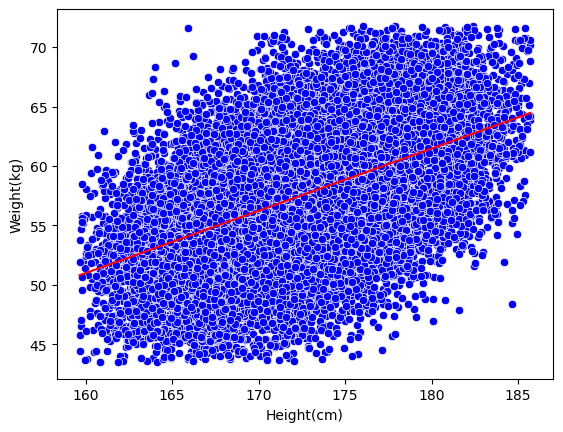

In [76]:
sns.scatterplot(data=df, x='Height(cm)', y='Weight(kg)', color='blue')
sns.lineplot(data=df, x='Height(cm)', y=model.predict(scaler.transform(X)), color='red')
plt.show()

C:\Users\GARDAS AKASH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\GARDAS AKASH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\GARDAS AKASH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\GARDAS AKASH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

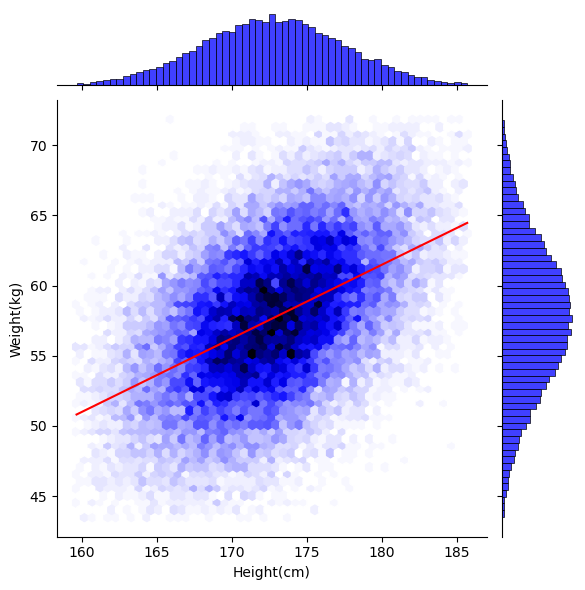

In [77]:
sns.jointplot(data=df, x='Height(cm)', y='Weight(kg)', color='blue', kind='hex')
sns.lineplot(data=df, x='Height(cm)', y=model.predict(scaler.transform(X)), color='red')
plt.show()

In [78]:
model.score(X_test_scaled, y_test)

0.24523624987347037